### CDF for rolling two dices

Plotting the CDF for rolling two dices, where the x value is the sum of the two dices, and the y value is the CDF for the distribution.

In [1]:
import pandas as pd #dataframes
import numpy as np #arrays
import scipy as stats #statistics
import matplotlib.pyplot as plt #visualization
import random #random values

In [2]:
#possible outcomes of rolling ONE dice
possible_faces = [1, 2, 3, 4, 5, 6]
random.choice(possible_faces)

#number of times the dice will be rolled
NUM_TRIALS = 10000

#results for dice 1
results_1 = np.array([random.choice(possible_faces)
          for i in range(NUM_TRIALS)])

#results for dice 2
results_2 = np.array([random.choice(possible_faces)
          for i in range(NUM_TRIALS)])

#sum of results
sum_of_results = results_1 + results_2

In [3]:
#finding the frequency of sum of results
from collections import Counter
counts = Counter(sum_of_results)
c =counts

#creating a dataframe to manipulate values easier
df = pd.DataFrame.from_dict(c, orient='index').reset_index()
df.columns = ['SUM_OF_RESULTS', 'FREQ']
df = df.sort_values(by=['SUM_OF_RESULTS'])
df

,SUM_OF_RESULTS,FREQ
8,2,279
4,3,535
10,4,802
6,5,1091
1,6,1434
3,7,1696
0,8,1393
5,9,1098
2,10,855
7,11,532


In [4]:
#define PMF
df['PMF'] = df['FREQ']/10000

#define CDF
df['CDF'] = df['PMF'].rolling(min_periods=1, window=10).sum()

#display header 
df

,SUM_OF_RESULTS,FREQ,PMF,CDF
8,2,279,0.0279,0.0279
4,3,535,0.0535,0.0814
10,4,802,0.0802,0.1616
6,5,1091,0.1091,0.2707
1,6,1434,0.1434,0.4141
3,7,1696,0.1696,0.5837
0,8,1393,0.1393,0.7230
5,9,1098,0.1098,0.8328
2,10,855,0.0855,0.9183
7,11,532,0.0532,0.9715


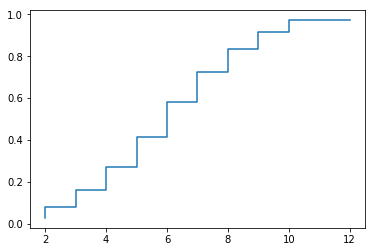

In [5]:
#plot CDF of the sum of two dices rolled 10000 times
plt.step(df['SUM_OF_RESULTS'],df['CDF'])

### Using Allen B. Downey's library to calculate the same CDF

Plotting the CDF for rolling two dices, where the x value is the sum of the two dices, and the y value is the CDF for the distribution.

In [6]:
import thinkstats2 #statistics
import thinkplot #visualization

In [7]:
#define CDF
cdf = thinkstats2.Cdf(sum_of_results, label='Sum of Results')
cdf

Cdf([ 2  3  4  5  6  7  8  9 10 11 12], [0.0279 0.0814 0.1616 0.2707 0.4141 0.5837 0.723  0.8328 0.9183 0.9715
 1.    ], 'Sum of Results')

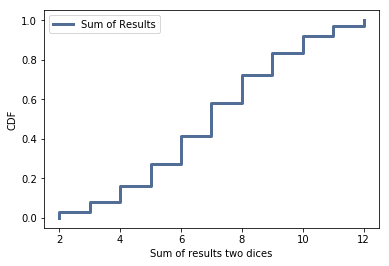

In [8]:
#plot CDF of the sum of two dices rolled 10000 times
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sum of results two dices', ylabel='CDF', loc='upper left')

## References

- https://github.com/AllenDowney/ThinkStats2 Allen B. Downey - Thinkstats2
- https://github.com/PythonCharmers/QuantFinance Edschofield - PythonCharmers - QuantFinance